In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as mplot
import math

mplot.rcParams['figure.figsize'] = [45*0.2, 30*0.2]
mplot.rc('xtick', labelsize=20) 
mplot.rc('ytick', labelsize=20) 

In [2]:
def pol2cart(r,th):
 x = r*np.cos(th)
 y = r*np.sin(th) 
 return(x,y)

def cart2pol(x_in,y_in):
 r_out = np.sqrt(x_in**2+y_in**2)
 th_out = np.arctan2(y_in,x_in)
 return(r_out,th_out)

def create_source(Strength,X_in,Y_in):
 
 #Calculate radius and angle for each given X and Y
 R,TH = cart2pol(X_in,Y_in)

 #Calculate vector field components in polar coordinates
 Ur = Strength/(2*3.14*R)
 Uth = Ur*0;

 #th_check = np.linspace(0,6.28,100)  
 #for th1 in th_check
 rad = 5
 tol = 0.006
 CircleInd = (R<rad+tol)&(R>rad-tol)
   
 mplot.scatter(X_in[CircleInd],Y_in[CircleInd])
 
 print(sum(Ur[CircleInd])/(2*np.pi))
    
 #Calculate vector components in cartesian coordinates
 Ux = Ur*np.cos(TH) - Uth*np.sin(TH)
 Vy = Ur*np.sin(TH) + Uth*np.cos(TH)

 return (Ux,Vy)

In [3]:
N = 500;
x_start = -6;
x_end = 6;
y_start = -6;
y_end = 6;

x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start,y_end,N)

X, Y = np.meshgrid(x,y)

9.944926073719195
-9.944926073719197


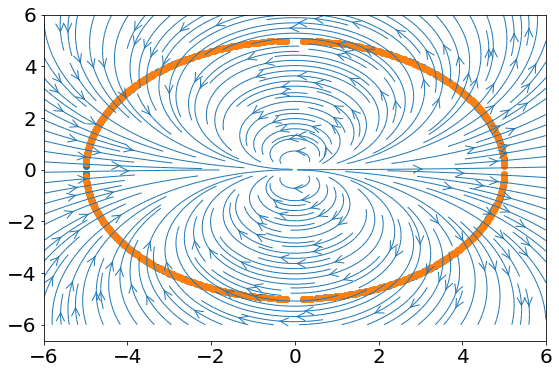

In [4]:
sigma = 3
#Ur = sigma/(2*3.14*R)
#Uth = Ur*0;

U_source, V_source = create_source(sigma,X-0.05,Y)
U_sink, V_sink = create_source(-sigma,X+0.05,Y)

U = U_source + U_sink
V = V_source + V_sink

mplot.streamplot(X, Y, U, V, density=2, linewidth=1, arrowsize=2, arrowstyle='->')